In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
import tensorflow as tf
from aux_func import show_history, r2_keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from time import time
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [4]:
from tensorflow.keras.datasets import cifar100

(X_train_cifar100, y_train_cifar100), (X_validation_cifar100, y_validation_cifar100) = cifar100.load_data()
X_train_cifar100 = X_train_cifar100/255
X_validation_cifar100 = X_validation_cifar100/255

169017344/169001437 [==============================] - 3s 0us/step


# Mejor modelo

In [5]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=50, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Dropout(0.7)(layer)
layer = Conv2D(filters=100, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Conv2D(filters=200, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = Flatten()(layer)
layer = Dropout(0.7)(layer)
layer = Dense(units=700, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)
# Podemos decidir que score queremos monitorizar, cuantas epochs esperar después del mejor score y si queremos que nos devuelva el mejor modelo.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, mode='max')
# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=30, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100),callbacks=[early_stopping, reduce_lr])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 50)        1400      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 50)       200       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 50)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 100)       45100 

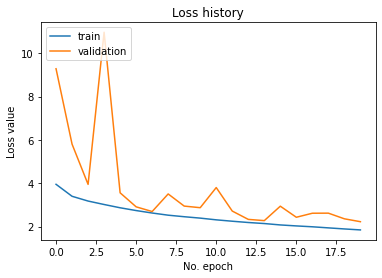

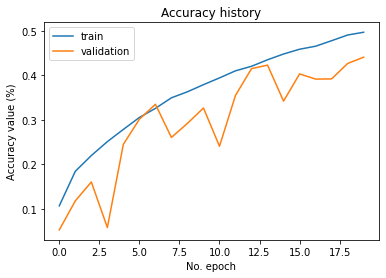

In [6]:
show_history(history)

In [7]:
print("Evaluate on validation data")
results = model.evaluate(X_validation_cifar100, y_validation_cifar100, batch_size=128)
print('val loss:',results[0], 'val acc:', results[1])

Evaluate on validation data
79/79 [==============================] - 1s 11ms/step - loss: 2.2273 - accuracy: 0.4409
val loss: 2.227322578430176 val acc: 0.4408999979496002


In [ ]:
scores = []
epochs_train = []
for bs in range(1,30,5):
    # capas de la red
    input = Input(shape=(32,32,3))
    layer = input
    layer = Conv2D(filters=50, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
    layer = MaxPooling2D((2, 2))(layer)
    layer = BatchNormalization()(layer)
    layer = Dropout(0.7)(layer)
    layer = Conv2D(filters=100, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
    layer = MaxPooling2D((2, 2))(layer)
    layer = BatchNormalization()(layer)
    layer = Conv2D(filters=200, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
    layer = MaxPooling2D((2, 2))(layer)
    layer = BatchNormalization()(layer)
    layer = Flatten()(layer)
    layer = Dropout(0.7)(layer)
    layer = Dense(units=700, activation='relu')(layer)
    output = Dense(units=100, activation='softmax')(layer)

    # creamos el modelo
    model = Model(inputs=input, outputs=output)
    print(model.summary())

    # optimizador
    optimizer = Adam(learning_rate=0.001)

    # función loss
    loss = SparseCategoricalCrossentropy(from_logits=False)

    # métrica
    metrics = ['accuracy']
    #añadimos early stopping
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)
    # Podemos decidir que score queremos monitorizar, cuantas epochs esperar después del mejor score y si queremos que nos devuelva el mejor modelo.
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, mode='max')
    # compilamos el modelo
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    history = model.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=bs, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100),callbacks=[early_stopping, reduce_lr])
    scores.append(model.evaluate(X_validation_cifar100, y_validation_cifar100, batch_size=128)[1])
    epochs_train.append(len(history.history['loss']))


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 50)        200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 100)       45100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 100)        

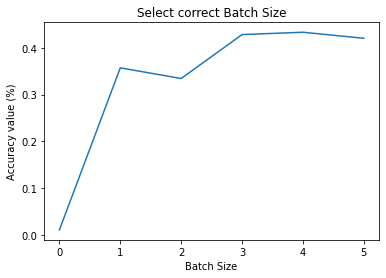

In [ ]:
plt.plot(scores)
plt.title('Select correct Batch Size')
plt.ylabel('Accuracy value (%)')
plt.xlabel('Batch Size')
plt.show()

In [ ]:
scores

[0.010700000450015068,
 0.3571999967098236,
 0.3343999981880188,
 0.42829999327659607,
 0.4332999885082245,
 0.4203999936580658]

# Pruebas

In [ ]:
from tensorflow.data import Dataset

# Creamos un Dataset utilizando numpys
train_ds = Dataset.from_tensor_slices((X_train_cifar100, y_train_cifar100))
val_ds = Dataset.from_tensor_slices((X_validation_cifar100, y_validation_cifar100))

# Seleccionamos el batch_size que
batch_size = 50

# Creamos una función que perturbará de forma aleatoria las imágenes.
# Las etiquetas quedan invariantes
def processing_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.2)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    image = tf.image.random_saturation(image, 0.8, 1.2)
    image = tf.image.random_hue(image, 0.05)
    image = tf.image.resize(image, (40,40), method='nearest',antialias=False)
    image = tf.image.random_crop(image, (32,32,3))
    return image, label


# Esta función hará las modificaciones pertinentes al dataset para poder usarlo durante el entrenamiento
def data_aug(ds: Dataset, shuffle=False, augment=False):
    # Hacemos que el dataset se repita de manera indefinida
    ds = ds.repeat()

    # Aleatorizamos el dataset usando un buffer de 5000
    if shuffle:
        ds = ds.shuffle(5000)

    # Aplicamos las transformaciones pertinentes
    if augment:
        ds = ds.map(processing_data,num_parallel_calls=4)

    # Hacemos que el dataset este formado por batches
    ds = ds.batch(batch_size)

    # Devolvemos el dataset precargándolo
    return ds.prefetch(buffer_size=4)

# Aplicamos la función data_aug a nuestro dataset
train_ds = data_aug(train_ds, shuffle=True, augment=True)
# Al dataset de validación no le aplicamos perturbaciones
val_ds = data_aug(val_ds)



## Prueba 1

In [ ]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=25, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.7)(layer)
layer = Conv2D(filters=50, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = BatchNormalization()(layer)
layer = Conv2D(filters=100, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = BatchNormalization()(layer)
layer = Flatten()(layer)
layer = Dropout(0.7)(layer)
layer = Dense(units=500, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model1 = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)
# compilamos el modelo
model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history1 = model1.fit(x=X_train_cifar100, y=y_train_cifar100, batch_size=30, epochs=20,
                    validation_data=(X_validation_cifar100, y_validation_cifar100),callbacks=[early_stopping])

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 16, 16, 50)        200       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 100)       45100     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 100)       

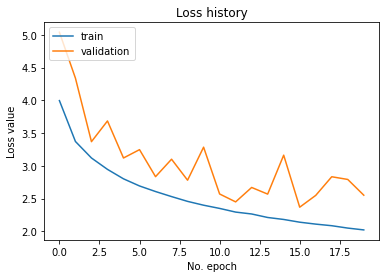

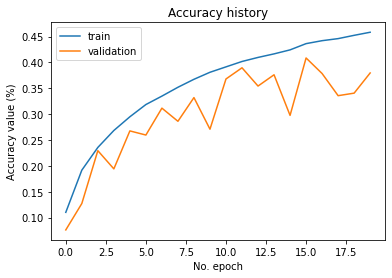

In [ ]:
show_history(history1)

## Prueba 2

In [ ]:
# capas de la red
input = Input(shape=(32,32,3))
layer = input
layer = Conv2D(filters=50, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = BatchNormalization()(layer)
layer = Conv2D(filters=100, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = BatchNormalization()(layer)
layer = Conv2D(filters=200, kernel_size=3, strides=1, padding='same', activation='relu')(layer)
layer = MaxPooling2D((2, 2))(layer)
layer = BatchNormalization()(layer)
layer = Flatten()(layer)
layer = Dropout(0.5)(layer)
layer = Dense(units=2000, activation='relu')(layer)
output = Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model2 = Model(inputs=input, outputs=output)
print(model2.summary())

# optimizador
optimizer = Adam(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history2 = model2.fit(train_ds, batch_size=30, epochs=20,
                    steps_per_epoch=100, validation_data=val_ds, validation_steps=200)

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 50)        1400      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 50)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 16, 16, 50)        200       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 100)       45100     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 100)         0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 8, 8, 100)       

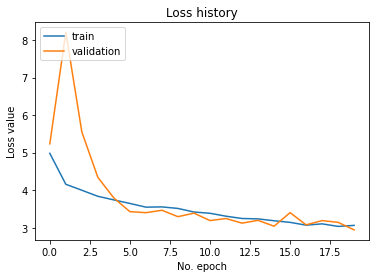

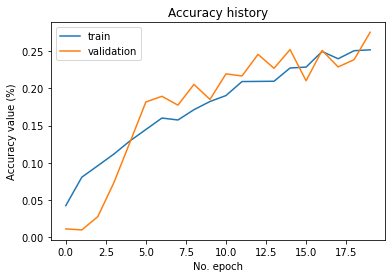

In [ ]:
show_history(history2)